### RFM 분석 실습
- Recency: 얼마나 최근에 구매했는가
- Frequency: 얼마나 자주 구매했는가
- Monetary: 얼마나 많은 금액을 지출했는가

### 고객 분석
- CustomerID: 고객 번호
- PurchaseDate: 구매 날짜
- TransactionAmount: 결제 금액 
- ProductInformation: 상품 정보
- OrderID: 주문 번호
- Location: 주문 지역

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import iqr

path = './datasets/customer_order_data.csv'

# csv파일을 열어보고 구분점에 따라 직접 적어줘야한다. defalut= ,(콤마)
cp_df = pd.read_csv(path)

display(cp_df)

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris
...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London
996,6669,2023-06-10,941.50,Product C,987025,New York
997,8836,2023-06-10,545.36,Product C,512842,London
998,1440,2023-06-10,729.94,Product B,559753,Paris


In [2]:
# cp_df[['PurchaseDate']]
cp_df[['PurchaseDate']].sort_values(by=['PurchaseDate'], axis=0)

,PurchaseDate
0,2023-04-11
1,2023-04-11
2,2023-04-11
3,2023-04-11
4,2023-04-11
...,...
982,2023-06-10
981,2023-06-10
998,2023-06-10
989,2023-06-10


In [3]:
cp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          1000 non-null   int64  
 1   PurchaseDate        1000 non-null   object 
 2   TransactionAmount   1000 non-null   float64
 3   ProductInformation  1000 non-null   object 
 4   OrderID             1000 non-null   int64  
 5   Location            1000 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [4]:
# 중복 행 검사
print(cp_df.duplicated())
print("=" * 40)
cp_df.duplicated().sum()
# 중복 행 없음

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool


0

In [5]:
# 결측치 검사
cp_df.isnull().sum()
# 결측치 없음

CustomerID            0
PurchaseDate          0
TransactionAmount     0
ProductInformation    0
OrderID               0
Location              0
dtype: int64

In [6]:
# 이상치 확인

amount_Q1 = cp_df.describe().T.loc['TransactionAmount', '25%']
amount_Q3 = cp_df.describe().T.loc['TransactionAmount', '75%']
print(amount_Q1, amount_Q3)

# iqr
iqr_value = amount_Q3 - amount_Q1
print(iqr_value)

# scipy로 iqr구하기
# iqr_value = iqr(happiness_df.score)
# print(iqr_value)

lower_bound = amount_Q1 - 1.5 * iqr_value
upper_bound = amount_Q3 + 1.5 * iqr_value

# 결제금액이 음수일 순 없기때문에 음수일 경우 0으로 변경
if lower_bound < 0 :
    lower_bound = 0

print(f'정상치 범위: {lower_bound} ~ {upper_bound}')



257.12 759.86
502.74
정상치 범위: 0 ~ 1513.97


In [7]:
cp_df[cp_df["TransactionAmount"] <= upper_bound]
# 이상치 확인 결과 이상치가 있을것으로 예상했던 TransactionAmount에는 이상치가 없었다(1000개가 그대로 나옴)

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris
...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London
996,6669,2023-06-10,941.50,Product C,987025,New York
997,8836,2023-06-10,545.36,Product C,512842,London
998,1440,2023-06-10,729.94,Product B,559753,Paris


Recency: 얼마나 최근에 구매했는가
Frequency: 얼마나 자주 구매했는가
Monetary: 얼마나 많은 금액을 지출했는가

In [8]:
# CustomerID를 기준으로 주문 횟수를 계산하여 출력
order_counts = cp_df['CustomerID'].value_counts()
print(order_counts)

CustomerID
7363    3
4804    3
5557    3
1519    2
5634    2
       ..
1341    1
8822    1
9442    1
5706    1
4759    1
Name: count, Length: 946, dtype: int64


In [9]:
from datetime import datetime

# 데이터프레임의 PurchaseDate 열을 datetime 형식으로 변환
cp_df['PurchaseDate'] = pd.to_datetime(cp_df['PurchaseDate'])

# 현재 날짜와 시간 가져오기
current_datetime = pd.Timestamp(datetime.now())

# 각 행의 PurchaseDate와 현재 날짜 간의 차이를 계산하여 새로운 열에 추가
cp_df['Recency'] = (current_datetime - cp_df['PurchaseDate']).dt.days
cp_df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,353
1,2188,2023-04-11,463.70,Product A,176819,London,353
2,4608,2023-04-11,80.28,Product A,340062,New York,353
3,2559,2023-04-11,221.29,Product A,239145,London,353
4,9482,2023-04-11,739.56,Product A,194545,Paris,353
...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,293
996,6669,2023-06-10,941.50,Product C,987025,New York,293
997,8836,2023-06-10,545.36,Product C,512842,London,293
998,1440,2023-06-10,729.94,Product B,559753,Paris,293


In [10]:
cp_df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,353
1,2188,2023-04-11,463.70,Product A,176819,London,353
2,4608,2023-04-11,80.28,Product A,340062,New York,353
3,2559,2023-04-11,221.29,Product A,239145,London,353
4,9482,2023-04-11,739.56,Product A,194545,Paris,353
...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,293
996,6669,2023-06-10,941.50,Product C,987025,New York,293
997,8836,2023-06-10,545.36,Product C,512842,London,293
998,1440,2023-06-10,729.94,Product B,559753,Paris,293


In [34]:
# co_df = cp_df.groupby('CustomerID')['Recency'].min().reset_index(name='Recency')
# co_df

test = cp_df.groupby('CustomerID')['Recency'].min().reset_index(name='test')
test

,CustomerID,test
0,1011,326
1,1025,314
2,1029,293
3,1046,336
4,1049,306
...,...,...
941,9941,335
942,9950,331
943,9954,305
944,9985,350


In [12]:
order_count = cp_df.groupby('CustomerID').size().reset_index(name='OrderCount')
co_df['OrderCount'] = order_count['OrderCount']
display(co_df)

,CustomerID,Recency,OrderCount
0,1011,326,2
1,1025,314,1
2,1029,293,1
3,1046,336,1
4,1049,306,1
...,...,...,...
941,9941,335,1
942,9950,331,1
943,9954,305,1
944,9985,350,1


In [13]:
Monetary = cp_df.groupby('CustomerID')['TransactionAmount'].sum().reset_index(name='Monetary')
co_df['Monetary'] = Monetary['Monetary']
co_df

,CustomerID,Recency,OrderCount,Monetary
0,1011,326,2,1129.02
1,1025,314,1,359.29
2,1029,293,1,704.99
3,1046,336,1,859.82
4,1049,306,1,225.72
...,...,...,...,...
941,9941,335,1,960.53
942,9950,331,1,679.11
943,9954,305,1,798.01
944,9985,350,1,36.10


In [14]:
co_df['ProductInformation'] = cp_df.groupby('CustomerID')['ProductInformation'].last().values
co_df

,CustomerID,Recency,OrderCount,Monetary,ProductInformation
0,1011,326,2,1129.02,Product B
1,1025,314,1,359.29,Product D
2,1029,293,1,704.99,Product D
3,1046,336,1,859.82,Product B
4,1049,306,1,225.72,Product A
...,...,...,...,...,...
941,9941,335,1,960.53,Product B
942,9950,331,1,679.11,Product C
943,9954,305,1,798.01,Product B
944,9985,350,1,36.10,Product D


In [15]:
co_df['Locations'] = cp_df.groupby('CustomerID')['Location'].last().values
co_df

,CustomerID,Recency,OrderCount,Monetary,ProductInformation,Locations
0,1011,326,2,1129.02,Product B,Paris
1,1025,314,1,359.29,Product D,New York
2,1029,293,1,704.99,Product D,New York
3,1046,336,1,859.82,Product B,Paris
4,1049,306,1,225.72,Product A,Tokyo
...,...,...,...,...,...,...
941,9941,335,1,960.53,Product B,Paris
942,9950,331,1,679.11,Product C,Tokyo
943,9954,305,1,798.01,Product B,Tokyo
944,9985,350,1,36.10,Product D,New York


In [16]:
co_df.rename(columns = {'OrderCount' : 'Frequency'}, inplace = True)
co_df

,CustomerID,Recency,Frequency,Monetary,ProductInformation,Locations
0,1011,326,2,1129.02,Product B,Paris
1,1025,314,1,359.29,Product D,New York
2,1029,293,1,704.99,Product D,New York
3,1046,336,1,859.82,Product B,Paris
4,1049,306,1,225.72,Product A,Tokyo
...,...,...,...,...,...,...
941,9941,335,1,960.53,Product B,Paris
942,9950,331,1,679.11,Product C,Tokyo
943,9954,305,1,798.01,Product B,Tokyo
944,9985,350,1,36.10,Product D,New York


In [17]:
co_df['Frequency'] = co_df['Frequency'] - 1

In [18]:
co_df

,CustomerID,Recency,Frequency,Monetary,ProductInformation,Locations
0,1011,326,1,1129.02,Product B,Paris
1,1025,314,0,359.29,Product D,New York
2,1029,293,0,704.99,Product D,New York
3,1046,336,0,859.82,Product B,Paris
4,1049,306,0,225.72,Product A,Tokyo
...,...,...,...,...,...,...
941,9941,335,0,960.53,Product B,Paris
942,9950,331,0,679.11,Product C,Tokyo
943,9954,305,0,798.01,Product B,Tokyo
944,9985,350,0,36.10,Product D,New York


In [19]:
co_rfm_df = co_df[['Recency', 'Frequency', 'Monetary']]
co_rfm_df

,Recency,Frequency,Monetary
0,326,1,1129.02
1,314,0,359.29
2,293,0,704.99
3,336,0,859.82
4,306,0,225.72
...,...,...,...
941,335,0,960.53
942,331,0,679.11
943,305,0,798.01
944,350,0,36.10


In [20]:
co_rfm_df.info()
co_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    946 non-null    int64  
 1   Frequency  946 non-null    int64  
 2   Monetary   946 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 22.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          946 non-null    int64  
 1   Recency             946 non-null    int64  
 2   Frequency           946 non-null    int64  
 3   Monetary            946 non-null    float64
 4   ProductInformation  946 non-null    object 
 5   Locations           946 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 44.5+ KB


In [21]:
from sklearn.preprocessing import MinMaxScaler

# 모든 값을 0~1사이의 값으로 변경
nomalization = MinMaxScaler()
rfm_nomalization = nomalization.fit_transform(co_rfm_df)

In [22]:
co_rfm_df = pd.DataFrame(rfm_nomalization, columns=co_rfm_df.columns)
co_rfm_df

,Recency,Frequency,Monetary
0,0.550000,0.5,0.471795
1,0.350000,0.0,0.146647
2,0.000000,0.0,0.292677
3,0.716667,0.0,0.358080
4,0.216667,0.0,0.090224
...,...,...,...
941,0.700000,0.0,0.400622
942,0.633333,0.0,0.281745
943,0.200000,0.0,0.331970
944,0.950000,0.0,0.010125


In [35]:
co_rfm_df['Recency'] = 1 - co_rfm_df['Recency']

In [36]:
co_rfm_df

,Recency,Frequency,Monetary
0,0.450000,0.5,0.471795
1,0.650000,0.0,0.146647
2,1.000000,0.0,0.292677
3,0.283333,0.0,0.358080
4,0.783333,0.0,0.090224
...,...,...,...
941,0.300000,0.0,0.400622
942,0.366667,0.0,0.281745
943,0.800000,0.0,0.331970
944,0.050000,0.0,0.010125


In [23]:
co_df['TotalScore'] = co_rfm_df['Recency'] + co_rfm_df['Frequency'] + co_rfm_df['Monetary']
co_df

,CustomerID,Recency,Frequency,Monetary,ProductInformation,Locations,TotalScore
0,1011,326,1,1129.02,Product B,Paris,1.521795
1,1025,314,0,359.29,Product D,New York,0.496647
2,1029,293,0,704.99,Product D,New York,0.292677
3,1046,336,0,859.82,Product B,Paris,1.074747
4,1049,306,0,225.72,Product A,Tokyo,0.306891
...,...,...,...,...,...,...,...
941,9941,335,0,960.53,Product B,Paris,1.100622
942,9950,331,0,679.11,Product C,Tokyo,0.915078
943,9954,305,0,798.01,Product B,Tokyo,0.531970
944,9985,350,0,36.10,Product D,New York,0.960125


In [24]:
# 이제 필요없어진 RFM을 DROP
co_df = co_df.drop(columns=['Recency', 'Frequency', 'Monetary'], axis=1)
co_df

,CustomerID,ProductInformation,Locations,TotalScore
0,1011,Product B,Paris,1.521795
1,1025,Product D,New York,0.496647
2,1029,Product D,New York,0.292677
3,1046,Product B,Paris,1.074747
4,1049,Product A,Tokyo,0.306891
...,...,...,...,...
941,9941,Product B,Paris,1.100622
942,9950,Product C,Tokyo,0.915078
943,9954,Product B,Tokyo,0.531970
944,9985,Product D,New York,0.960125


In [25]:
import numpy as np

l1, l2, l3, l4 = np.percentile(co_df['TotalScore'], [20, 40, 70, 90])
print(l1, l2, l3, l4)

0.41412342508265365 0.6603278531560306 0.9635216193839449 1.1643879999324138


In [26]:
def get_level(x):
    if x <= l1:
        return 5
    if x > l1 and x <= l2:
        return 4
    if x > l2 and x <= l3:
        return 3
    if x > l3 and x <= l4:
        return 2
    return 1

In [27]:
co_df['Level'] = co_df['TotalScore'].apply(get_level)

In [28]:
co_df

,CustomerID,ProductInformation,Locations,TotalScore,Level
0,1011,Product B,Paris,1.521795,1
1,1025,Product D,New York,0.496647,4
2,1029,Product D,New York,0.292677,5
3,1046,Product B,Paris,1.074747,2
4,1049,Product A,Tokyo,0.306891,5
...,...,...,...,...,...
941,9941,Product B,Paris,1.100622,2
942,9950,Product C,Tokyo,0.915078,3
943,9954,Product B,Tokyo,0.531970,4
944,9985,Product D,New York,0.960125,3


In [29]:
co_df['Level'] = co_df['Level'].replace([5, 4, 3, 2, 1], ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP'])

In [30]:
co_df

,CustomerID,ProductInformation,Locations,TotalScore,Level
0,1011,Product B,Paris,1.521795,VIP
1,1025,Product D,New York,0.496647,Silver
2,1029,Product D,New York,0.292677,Bronze
3,1046,Product B,Paris,1.074747,Diamond
4,1049,Product A,Tokyo,0.306891,Bronze
...,...,...,...,...,...
941,9941,Product B,Paris,1.100622,Diamond
942,9950,Product C,Tokyo,0.915078,Gold
943,9954,Product B,Tokyo,0.531970,Silver
944,9985,Product D,New York,0.960125,Gold


In [31]:
print(co_df['Level'].value_counts())

Level
Gold       283
Bronze     190
Silver     189
Diamond    189
VIP         95
Name: count, dtype: int64


<Axes: xlabel='Level', ylabel='count'>

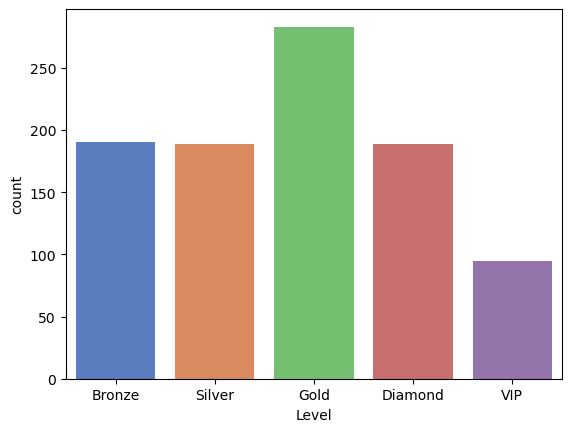

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

order_columns = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']

sns.countplot(x='Level', data=co_df, palette='muted', order=order_columns)

<Axes: xlabel='Locations', ylabel='count'>

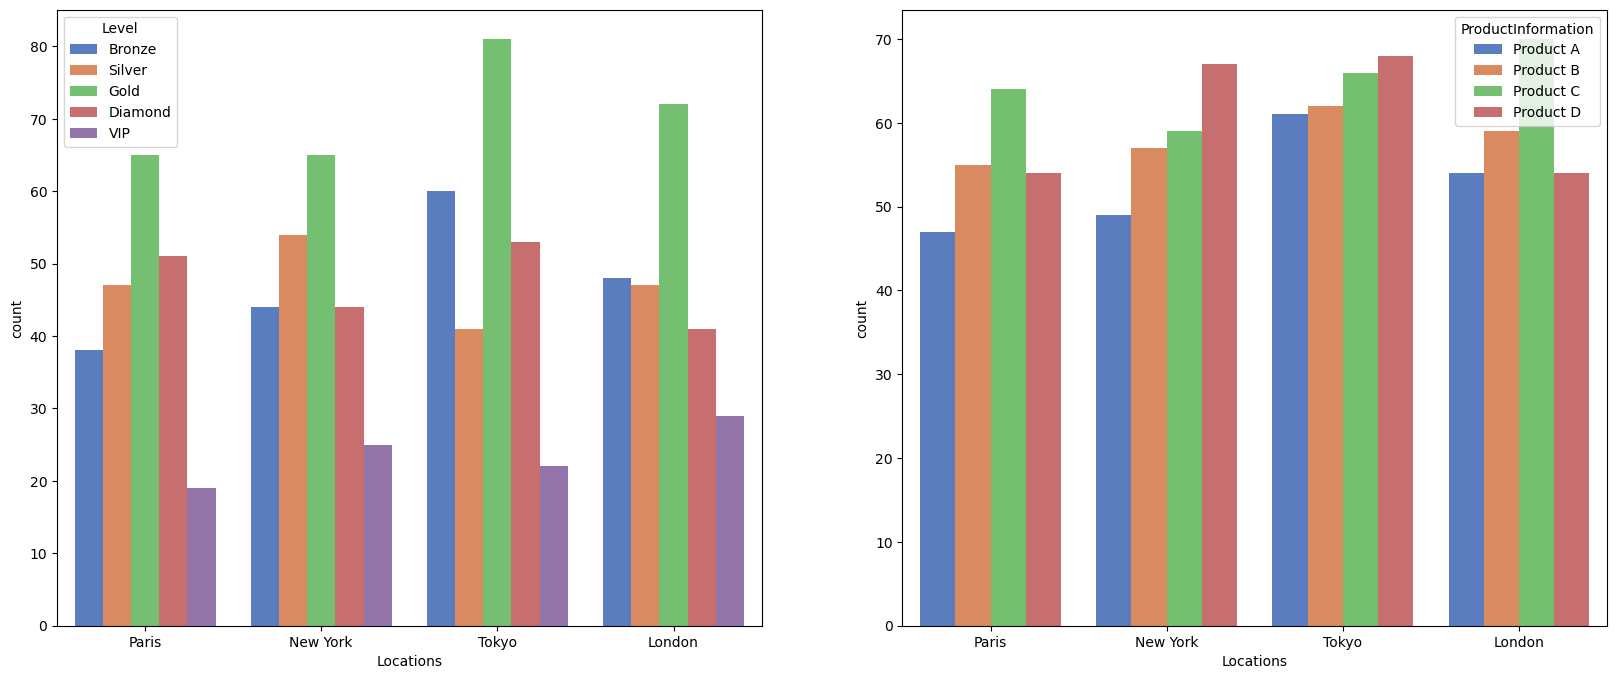

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

order_columns = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']
product_colums = ['Product A', 'Product B', 'Product C', 'Product D']

sns.countplot(ax=axes[0], x='Locations', hue='Level', data=co_df, palette='muted', hue_order=order_columns)
sns.countplot(ax=axes[1], x='Locations', hue='ProductInformation', data=co_df, palette='muted', hue_order=product_colums)

- 등급

파리 - 골드, 다이아, 실버, 브론즈, vip

뉴욕 - 골드, 실버, 다이아, 브론즈, vip

도쿄 - 골드, 브론즈, 플레티넘, 실버, vip
도쿄는 전체적으로 높지만 특이하게 브론즈등급이 아주 많다. 그리고 상대적으로 VIP등급과 실버등급이 적다

런던 - 골드, 브론즈, 실버, 다이아, vip
런던 또한 전체적이게 높은편에 속하며 브론즈등급이 상대적이게 높은편이고 전체중에 VIP등급이 가장 많다

- 상품

파리에선 전체적인 수치가 좀 낮은편이며 A물품이 특히 안팔리며 C물품이 상대적으로 높다

뉴욕에선 A물품보다 D물품이 상대적으로 잘 팔리는 모습을 보여주며

도쿄는 전체적인 수치가 높고 도쿄 또한 뉴욕처럼 A ~ D 순서대로 더 잘나가는 모습을 보여준다

런던은 유독 C물품이 높은 수치를 보여주고 있다

네군데의 지역에서 또렷한 차이가 나타나지 않았지만
파리에서의 VIP 숫자가 상대적으로 적고 다이아가 상대적으로 많은것을 보아 계속해서 상품을 구매할 수 있게 만드는 이벤트, 등급별 로 혜택을 다르게 주어서
VIP 고객 혜택에 더 신경써주어야 할 것 같으며
지역별 물품에 관해서는 전체적이게 A물품이 인기가 없고 C물품과 D물품이 인기가 많은 점을 고려하여 A물품의 홍보에 더 비중을 두어
판매량을 끌어올려주는 방법이 좋을 것 같다